# 1. Import Libraries

In [ ]:
import random
import numpy as np 
import pandas as pd
import math
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.wrappers.scikit_learn import KerasRegressor
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# 2. Create Dataset

In [ ]:
df = pd.read_csv("/content/processed data.csv")
data = df.drop(columns=["Unnamed: 0", 'name', 'preferred_foot'])
# df.drop(columns=["name"])
print(data.shape)
data

(2002, 50)


,MP,Min,Goals,Assists,CrdY,CrdR,Comp,Shots,Acceleration,Aggression,...,Standing_Tackle,Strength,Vision,Volleys,age,overall,potential,position common,market value,wage value
0,34,2983,0.06,0.00,0.15,0.03,Ligue 1,0.54,37,81,...,78,83,45,24,33,76,76,defender,3600000.0,23000.0
1,31,2462,0.04,0.00,0.44,0.11,Ligue 1,0.66,50,79,...,71,56,65,38,21,70,75,midfielder,2200000.0,7000.0
2,34,2956,0.00,0.06,0.27,0.00,Ligue 1,0.91,77,76,...,76,67,66,37,28,75,75,midfielder,4900000.0,18000.0
3,24,726,0.00,0.12,0.37,0.00,Bundesliga,2.22,81,39,...,14,68,44,53,22,68,76,striker,2700000.0,9000.0
4,30,2536,0.14,0.00,0.07,0.04,Serie A,0.57,64,77,...,87,85,65,39,33,83,83,defender,17500000.0,75000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997,29,1410,0.06,0.13,0.19,0.00,Serie A,1.02,69,66,...,68,52,42,37,22,64,75,defender,1300000.0,8000.0
1998,24,2078,0.04,0.00,0.04,0.00,Premier League,0.30,54,84,...,82,93,60,47,26,81,84,defender,30000000.0,75000.0
1999,1,29,0.00,0.00,3.33,0.00,Serie A,0.00,23,17,...,10,56,32,6,19,58,73,goalkeeper,425000.0,850.0
2000,36,2591,0.07,0.03,0.14,0.00,La Liga,0.73,67,66,...,76,67,75,42,22,75,84,midfielder,12500000.0,24000.0


# 3. Convert category data into numeric data

In [ ]:
data['Comp'].replace(data['Comp'].unique(),[1, 3, 2, 4, 5], inplace=True)
data

,MP,Min,Goals,Assists,CrdY,CrdR,Comp,Shots,Acceleration,Aggression,...,Standing_Tackle,Strength,Vision,Volleys,age,overall,potential,position common,market value,wage value
0,34,2983,0.06,0.00,0.15,0.03,1,0.54,37,81,...,78,83,45,24,33,76,76,defender,3600000.0,23000.0
1,31,2462,0.04,0.00,0.44,0.11,1,0.66,50,79,...,71,56,65,38,21,70,75,midfielder,2200000.0,7000.0
2,34,2956,0.00,0.06,0.27,0.00,1,0.91,77,76,...,76,67,66,37,28,75,75,midfielder,4900000.0,18000.0
3,24,726,0.00,0.12,0.37,0.00,3,2.22,81,39,...,14,68,44,53,22,68,76,striker,2700000.0,9000.0
4,30,2536,0.14,0.00,0.07,0.04,2,0.57,64,77,...,87,85,65,39,33,83,83,defender,17500000.0,75000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997,29,1410,0.06,0.13,0.19,0.00,2,1.02,69,66,...,68,52,42,37,22,64,75,defender,1300000.0,8000.0
1998,24,2078,0.04,0.00,0.04,0.00,5,0.30,54,84,...,82,93,60,47,26,81,84,defender,30000000.0,75000.0
1999,1,29,0.00,0.00,3.33,0.00,2,0.00,23,17,...,10,56,32,6,19,58,73,goalkeeper,425000.0,850.0
2000,36,2591,0.07,0.03,0.14,0.00,4,0.73,67,66,...,76,67,75,42,22,75,84,midfielder,12500000.0,24000.0


In [ ]:
#convert the categorical variables to dummies
data = pd.get_dummies(data) 
# log tranformation for market vakue
data['market value'] = np.log(data['market value'])
data

,MP,Min,Goals,Assists,CrdY,CrdR,Comp,Shots,Acceleration,Aggression,...,Volleys,age,overall,potential,market value,wage value,position common_defender,position common_goalkeeper,position common_midfielder,position common_striker
0,34,2983,0.06,0.00,0.15,0.03,1,0.54,37,81,...,24,33,76,76,15.096444,23000.0,1,0,0,0
1,31,2462,0.04,0.00,0.44,0.11,1,0.66,50,79,...,38,21,70,75,14.603968,7000.0,0,0,1,0
2,34,2956,0.00,0.06,0.27,0.00,1,0.91,77,76,...,37,28,75,75,15.404746,18000.0,0,0,1,0
3,24,726,0.00,0.12,0.37,0.00,3,2.22,81,39,...,53,22,68,76,14.808762,9000.0,0,0,0,1
4,30,2536,0.14,0.00,0.07,0.04,2,0.57,64,77,...,39,33,83,83,16.677711,75000.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997,29,1410,0.06,0.13,0.19,0.00,2,1.02,69,66,...,37,22,64,75,14.077875,8000.0,1,0,0,0
1998,24,2078,0.04,0.00,0.04,0.00,5,0.30,54,84,...,47,26,81,84,17.216708,75000.0,1,0,0,0
1999,1,29,0.00,0.00,3.33,0.00,2,0.00,23,17,...,6,19,58,73,12.959844,850.0,0,1,0,0
2000,36,2591,0.07,0.03,0.14,0.00,4,0.73,67,66,...,42,22,75,84,16.341239,24000.0,0,0,1,0


# 4. Scale data and create Train and Test sets

In [ ]:
data_build = data.copy()
y = data_build['market value']
x = data_build.drop(columns =['market value'])

In [ ]:
# Standardization
def standard_scale(x):
    convert = StandardScaler().fit(x)
    return convert.transform(x)
x_scaled = standard_scale(x)

#create train set, test set
x_train, x_test, y_train, y_test = train_test_split(x_scaled ,y , test_size = 0.33, random_state = 3 )
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(1341, 52) (1341,) (661, 52) (661,)


# 5. Choosing best parametters for ANN model using GridSearchCV

## 5.1. Write function to find optimal number of hidden layers' nodes

In [ ]:
def FindLayerNodesLinear(n_layers, first_layer_nodes, last_layer_nodes):
    layers = []
    
    nodes_increment = (last_layer_nodes - first_layer_nodes)/ (n_layers-1)
    nodes = first_layer_nodes
    for i in range(1, n_layers+1):
        layers.append(math.ceil(nodes))
        nodes = nodes + nodes_increment
    
    return layers

FindLayerNodesLinear(5, 50, 10)

[50, 40, 30, 20, 10]

## 5.2. Write function to create ANN model

In [ ]:
def createmodel(n_layers, first_layer_nodes, last_layer_nodes, activation_func, optimizer, loss_func):
    model = Sequential()
    n_nodes = FindLayerNodesLinear(n_layers, first_layer_nodes, last_layer_nodes)
    for i in range(1, n_layers):
        if i==1:
            model.add(Dense(first_layer_nodes, input_dim=x_train.shape[1], kernel_initializer='normal', activation=activation_func))
        else:
            model.add(Dense(n_nodes[i-1], kernel_initializer='normal', activation=activation_func))
            
    model.add(Dense(1, kernel_initializer='normal', activation=activation_func))
    model.compile(optimizer=optimizer, loss=loss_func, metrics=['MSE']) 
    
    return model

## 5.3. Finding best parametters

In [ ]:
model =  KerasRegressor(build_fn=createmodel, verbose = 1)   
activation_funcs = ['sigmoid', 'relu', 'tanh', 'softmax', 'selu'] 
loss_funcs = ['mean_squared_error', "mean_absolute_error", 'mean_squared_logarithmic_error', "mean_absolute_percentage_error"]
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(n_layers=[5],
                  first_layer_nodes = [1500], 
                  last_layer_nodes = [10],  
                  activation_func = activation_funcs, 
                  loss_func = loss_funcs, 
                  optimizer = optimizer, 
                  batch_size = [64], 
                  epochs = [10])

grid = GridSearchCV(estimator = model, param_grid = param_grid)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [ ]:
grid.fit(x_train, y_train)

Streaming output truncated to the last 5000 lines.
5/5 [==============================] - 1s 14ms/step - loss: 14.5468 - MSE: 213.1255
Epoch 1/10
17/17 [==============================] - 1s 47ms/step - loss: 14.5490 - MSE: 213.1412
Epoch 2/10
17/17 [==============================] - 1s 46ms/step - loss: 14.5490 - MSE: 213.1411
Epoch 3/10
17/17 [==============================] - 1s 44ms/step - loss: 14.5490 - MSE: 213.1411
Epoch 4/10
17/17 [==============================] - 1s 44ms/step - loss: 14.5490 - MSE: 213.1412
Epoch 5/10
17/17 [==============================] - 1s 48ms/step - loss: 14.5490 - MSE: 213.1412
Epoch 6/10
17/17 [==============================] - 1s 43ms/step - loss: 14.5490 - MSE: 213.1412
Epoch 7/10
17/17 [==============================] - 1s 45ms/step - loss: 14.5490 - MSE: 213.1412
Epoch 8/10
17/17 [==============================] - 1s 43ms/step - loss: 14.5490 - MSE: 213.1411
Epoch 9/10
17/17 [==============================] - 1s 44ms/step - loss: 14.5490 - MSE: 2

GridSearchCV(estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f3f057bfbd0>,
             param_grid={'activation_func': ['sigmoid', 'relu', 'tanh',
                                             'softmax', 'selu'],
                         'batch_size': [64], 'epochs': [10],
                         'first_layer_nodes': [1500], 'last_layer_nodes': [10],
                         'loss_func': ['mean_squared_error',
                                       'mean_absolute_error',
                                       'mean_squared_logarithmic_error',
                                       'mean_absolute_percentage_error'],
                         'n_layers': [5],
                         'optimizer': ['SGD', 'RMSprop', 'Adagrad', 'Adadelta',
                                       'Adam', 'Adamax', 'Nadam']})

In [ ]:
print(-grid.best_score_)
print(grid.best_params_)

0.0019210508558899163
{'activation_func': 'selu', 'batch_size': 64, 'epochs': 10, 'first_layer_nodes': 1500, 'last_layer_nodes': 10, 'loss_func': 'mean_squared_logarithmic_error', 'n_layers': 5, 'optimizer': 'Adam'}


# 6. Create model with optimal parametters and make prediction

In [ ]:
model = createmodel(5, 1500, 10, 'selu', 'Adam', 'mean_squared_logarithmic_error')
model.fit(x_train, y_train, batch_size=64, epochs=10)

Epoch 1/10
21/21 [==============================] - 2s 58ms/step - loss: 1.1049 - MSE: 261.8884
Epoch 2/10
21/21 [==============================] - 1s 33ms/step - loss: 0.1740 - MSE: 135.8875
Epoch 3/10
21/21 [==============================] - 1s 31ms/step - loss: 0.0244 - MSE: 7.3343
Epoch 4/10
21/21 [==============================] - 1s 32ms/step - loss: 0.0053 - MSE: 1.4128
Epoch 5/10
21/21 [==============================] - 1s 32ms/step - loss: 0.0025 - MSE: 0.6611
Epoch 6/10
21/21 [==============================] - 1s 30ms/step - loss: 0.0019 - MSE: 0.5007
Epoch 7/10
21/21 [==============================] - 1s 33ms/step - loss: 0.0015 - MSE: 0.4007
Epoch 8/10
21/21 [==============================] - 1s 31ms/step - loss: 0.0012 - MSE: 0.3203
Epoch 9/10
21/21 [==============================] - 1s 32ms/step - loss: 0.0011 - MSE: 0.3105
Epoch 10/10
21/21 [==============================] - 1s 30ms/step - loss: 9.8228e-04 - MSE: 0.2586


In [ ]:
pred = model.predict(x_test)
pred

In [ ]:
print('r2 score :', r2_score(pred, y_test))
print('Root mean squared error: ' ,(mean_squared_error(pred ,y_test )**(1/2)))

r2 score : 0.7707037366414715
Root mean squared error:  0.650466074201643


# 7. Compare true values with predicted values

In [ ]:
true_val, pred_val = [], []
for val in y_test:
    true_val.append(val)
for val in pred:
    pred_val.append(val[0])

In [ ]:
true_pred = pd.DataFrame({'True value': true_val,
                          'Predicted value': pred_val})
true_pred

,True value,Predicted value
0,15.830414,15.927889
1,16.556351,15.811755
2,15.250595,15.808993
3,14.403297,13.908669
4,15.520259,14.349032
...,...,...
656,17.216708,16.919487
657,13.764217,14.477225
658,16.906553,16.683014
659,14.151983,13.938515


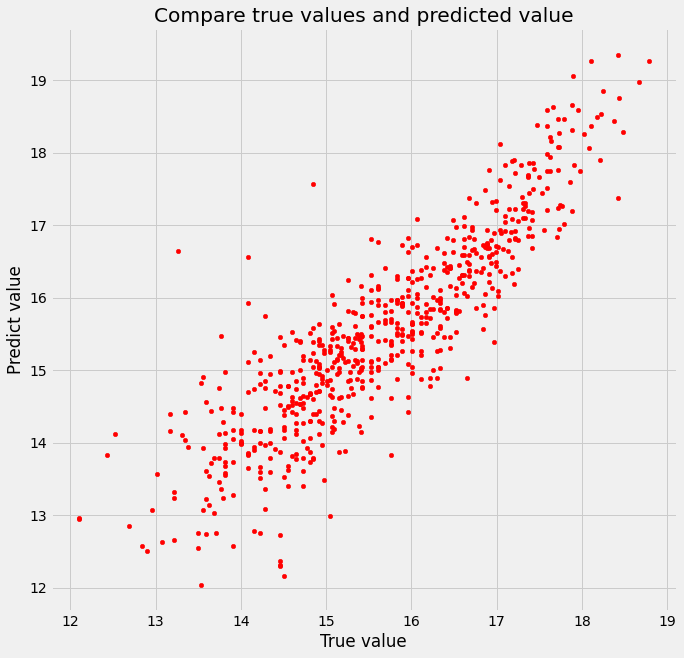

In [ ]:
true_pred.plot(
    x = 'True value',         
    y = 'Predicted value',         
    kind = 'scatter',    
    title= 'Compare true values and predicted value',  
    legend = False,   
    xlabel = "True value",    
    ylabel = 'Predict value',
    color = 'red',
    figsize = (10, 10)         
)
plt.show()